In [2]:
import pickle

In [23]:
NOISE_LEVEL = 0.1
SAMPLE = 1
NET = "from_scratch_"
#NET = ""

with open(f"pickles/{NET}{SAMPLE}_variance_{NOISE_LEVEL}.pickle", "rb") as f:
    variances = pickle.load(f)
variances

[array([0.00956302, 0.01039999, 0.00957452, ..., 0.00939775, 0.01020091,
        0.01014222], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.00273042, 0.0029784 ,
        0.00240943], dtype=float32),
 array([0.        , 0.00044933, 0.00048988, ..., 0.00053747, 0.0004028 ,
        0.00028943], dtype=float32),
 array([1.8840219e-05, 0.0000000e+00, 8.7131615e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.00140379, 0.0009953 ,
        0.00034811], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [25]:
len(variances)

7

In [26]:
max = variances[0].max()
max

0.011958828

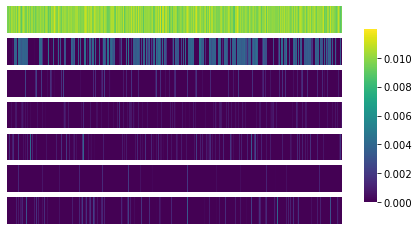

In [28]:
fig, axs = plt.subplots(nrows=7, ncols=1)
cbar_ax = fig.add_axes([.95, .2, .03, .6])
for i, var in enumerate(variances):
    #var = [x for x in var if x!=0]
    df = pd.DataFrame({"variance": var},
                      index=range(len(var)))
    sns.heatmap(df.T, annot=False,  cmap='viridis', ax=axs[i], vmin=0, vmax=max,
                cbar_ax=None if i else cbar_ax,
                cbar=i == 0)
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)
    

In [22]:
for var in variances:
    print(var.max())

0.012099214
0.14871064
1.0142051
1.795942
0.40282565
0.1671721
0.15533875


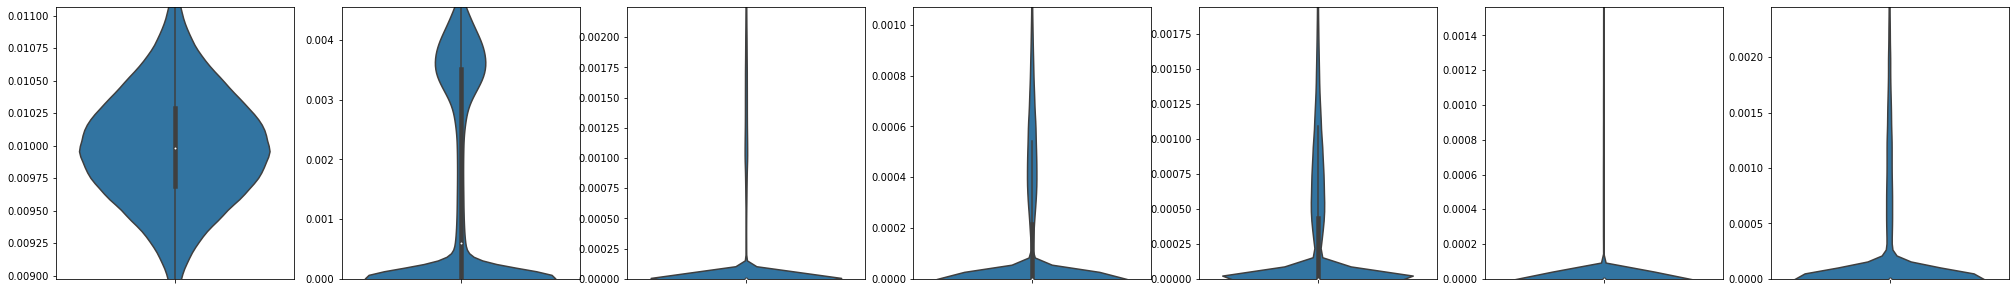

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(35, 5))
for i, var in enumerate(variances):
    sns.violinplot(y=var, ax=axs[i])
    m = np.quantile(var, 0.99)
    l = np.quantile(var, .01)
    axs[i].set(ylim=(l, m))